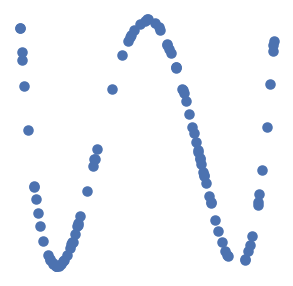

In [1]:
from hyppo.tools import w_shaped
import numpy as np

# 100 samples, 1D x and 1D y, with noise
x, y = w_shaped(n=100, p=1, noise=False)

import matplotlib.pyplot as plt
import seaborn as sns

# make plots look pretty
sns.set(color_codes=True, style="white", context="talk", font_scale=1)

# look at the simulation
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True, right=True)
plt.show()

In [2]:
from hyppo.independence import HHG

fastHHG = HHG(is_fast = True)

fastHHG.test(x, y, unitest='KS')

(0.49, 2.948425133635738e-11)

0.134


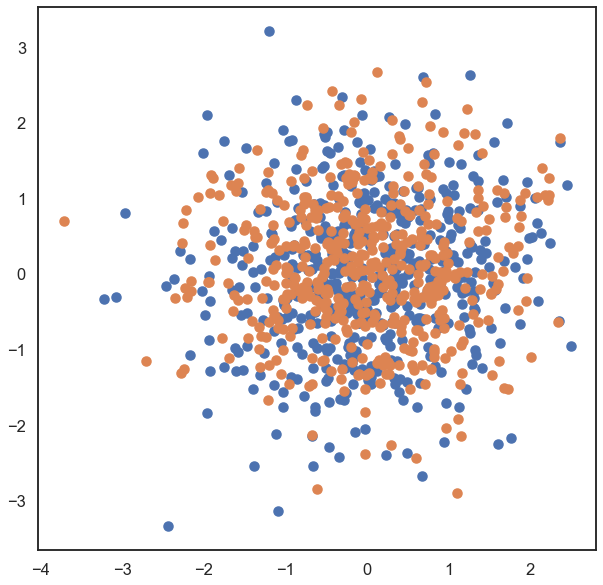

In [3]:
#Repeating Scenario A of Figure 2 of original paper
from numpy.random import multivariate_normal

test = HHG(is_fast = True)
x = multivariate_normal([0,0], [[1, 0],[0, 1]], 500)
y = multivariate_normal([0,0.05], [[0.9, 0],[0, 0.9]], 500)

plt.figure(figsize=(10, 10))
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

rejections = 0

for i in range(500):
    x = multivariate_normal([0,0], [[1, 0],[0, 1]], 100)
    y = multivariate_normal([0,0.05], [[0.9, 0],[0, 0.9]], 100)

    stat, pvalue = fastHHG.test(x, y, unitest='KS')
    
    if pvalue < 0.1:
        rejections += 1

print(rejections/500) #should correspond to result of row 5, column 4 of Table 1

0.982


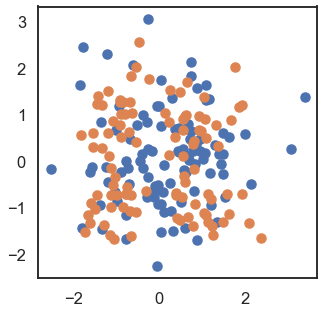

In [4]:
#Repeating Scenario B of Figure 2 of original paper
from numpy.random import multivariate_normal

test = HHG(is_fast = True)

#scatter plot of non-null distribution
x = multivariate_normal([0,0], [[1, 0],[0, 1]], 100)
y1 = multivariate_normal([1,1], [[0.25, 0],[0, 0.25]], 25)
y2 = multivariate_normal([1,-1], [[0.25, 0],[0, 0.25]], 25)
y3 = multivariate_normal([-1,1], [[0.25, 0],[0, 0.25]], 25)
y4 = multivariate_normal([-1,-1], [[0.25, 0],[0, 0.25]], 25)
y = np.concatenate([y1,y2,y3,y4], axis=0)

plt.figure(figsize=(7, 7))
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

rejections = 0

for i in range(500):
    x = multivariate_normal([0,0], [[1, 0],[0, 1]], 100)
    y1 = multivariate_normal([1,1], [[0.25, 0],[0, 0.25]], 25)
    y2 = multivariate_normal([1,-1], [[0.25, 0],[0, 0.25]], 25)
    y3 = multivariate_normal([-1,1], [[0.25, 0],[0, 0.25]], 25)
    y4 = multivariate_normal([-1,-1], [[0.25, 0],[0, 0.25]], 25)
    y = np.concatenate([y1,y2,y3,y4], axis=0)
    
    stat, pvalue = fastHHG.test(x, y, unitest='KS')
    
    if pvalue < 0.1:
        rejections += 1

print(rejections/500) #should correspond to result of row 5, column 5 of Table 1

0.18


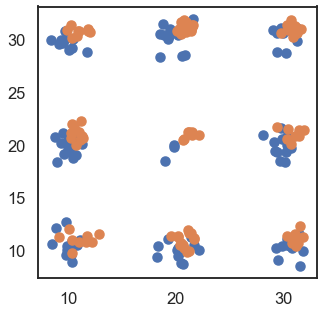

In [5]:
#Replicating Scenario C of Figure 2 of original paper
from numpy.random import multivariate_normal

test = HHG(is_fast = True)

centers = [[10,10],
          [10,20],
          [10,30],
          [20,10],
          [20,20],
          [20,30],
          [30,10],
          [30,20],
          [30,30]]

x = multivariate_normal(centers[0], [[1, 0],[0, 1]], 100)
y = multivariate_normal(np.add(centers[0],[1,1]), [[1, 0],[0, 1]], 100)

for i in range(1,9):
    xi = multivariate_normal(centers[i], [[1, 0],[0, 1]], 100)
    yi = multivariate_normal(np.add(centers[i],[1,1]), [[0.25, 0],[0, 0.25]], 100)
    x = np.concatenate([x,xi], axis=0)
    y = np.concatenate([y,yi], axis=0)
    
n = 100 
index = np.random.choice(x.shape[0], n, replace=False)
xtest = x[index]
index = np.random.choice(y.shape[0], n, replace=False)
ytest = y[index]

plt.figure(figsize=(7, 7))
plt.scatter(xtest[:,0],xtest[:,1])
plt.scatter(ytest[:,0],ytest[:,1])

rejections = 0

for i in range(500):
    x = multivariate_normal(centers[0], [[1, 0],[0, 1]], 100)
    y = multivariate_normal(np.add(centers[0],[1,1]), [[1, 0],[0, 1]], 100)

    for i in range(1,9):
        xi = multivariate_normal(centers[i], [[1, 0],[0, 1]], 100)
        yi = multivariate_normal(np.add(centers[i],[1,1]), [[0.25, 0],[0, 0.25]], 100)
        x = np.concatenate([x,xi], axis=0)
        y = np.concatenate([y,yi], axis=0)
    
    n = 100 
    index = np.random.choice(x.shape[0], n, replace=False)
    xtest = x[index]
    index = np.random.choice(y.shape[0], n, replace=False)
    ytest = y[index]
    
    stat, pvalue = fastHHG.test(xtest, ytest, unitest='KS')
    
    if pvalue < 0.1:
        rejections += 1
        
print('Prejections/500) #should correspond to result of row 5, column 6 of Table 1  

In [6]:
#Replicating Multidimension Test of Table 1 of original paper
#X has standard normal distribution of dimension 5
#Y is the multivariate t distribution, where each 5 independent coordinates has the univariate t distribution
#with 5 degrees of freedom

from numpy.random import standard_t

rejections = 0

for i in range(500):
    x = multivariate_normal([0, 0, 0, 0, 0], np.diag([1,1,1,1,1]), 100)
    y1 = standard_t(5, 100)
    y2 = standard_t(5, 100)
    y3 = standard_t(5, 100)
    y4 = standard_t(5, 100)
    y5 = standard_t(5, 100)
    y = np.concatenate([y1[:, None],y2[:, None],y3[:, None],y4[:, None],y5[:, None]], axis = 1)
    
    stat, pvalue = fastHHG.test(x, y, unitest='KS')
    
    if pvalue < 0.1:
        rejections += 1

print(rejections/500) #should correspond to result of row 5, column 7 of Table 1  

0.896


In [7]:
#Results when testing true null case
test = HHG(is_fast = True)

rejections = 0

for i in range(1000):
    x = multivariate_normal([0,0], [[1, 0],[0, 1]], 100)
    y = multivariate_normal([0,0], [[1, 0],[0, 1]], 100)

    stat, pvalue = fastHHG.test(x, y, unitest='KS')
    
    if pvalue < 0.1:
        rejections += 1

print(rejections/1000)

0.09
